# 1. 散点图（Scatter Plot）

findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'SimHei'

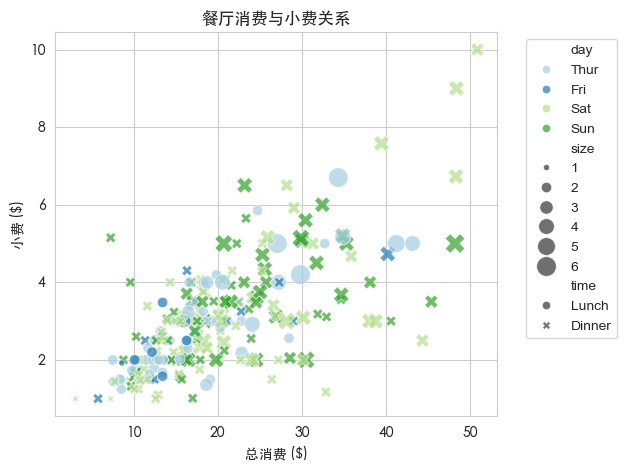

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 加载示例数据集
tips = sns.load_dataset("tips")

# 创建散点图，按day分类着色，size表示点大小
sns.scatterplot(
    data=tips, x="total_bill", y="tip", 
    hue="day", style="time", size="size",
    sizes=(20, 200), alpha=0.7
)

# 设置matplotlib正常显示中文和负号
plt.rcParams['font.family'] = 'sans-serif'  # 使用系统默认字体
# 设置字体为黑体, 'STHeitiSC-Light'是系统自带字体，'SimHei'是常见中文字体，'Arial Unicode MS'是支持更广泛Unicode字符的字体
plt.rcParams['font.sans-serif'] = ['STHeitiSC-Light', 'SimHei', 'Arial Unicode MS']  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

plt.title("餐厅消费与小费关系")
plt.xlabel("总消费 ($)")
plt.ylabel("小费 ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. 线性回归图（Regplot & LMplot）

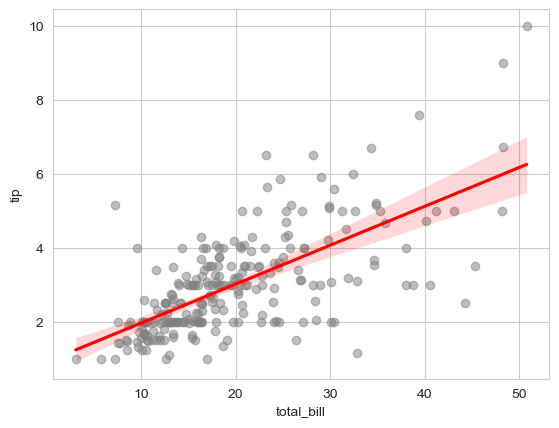

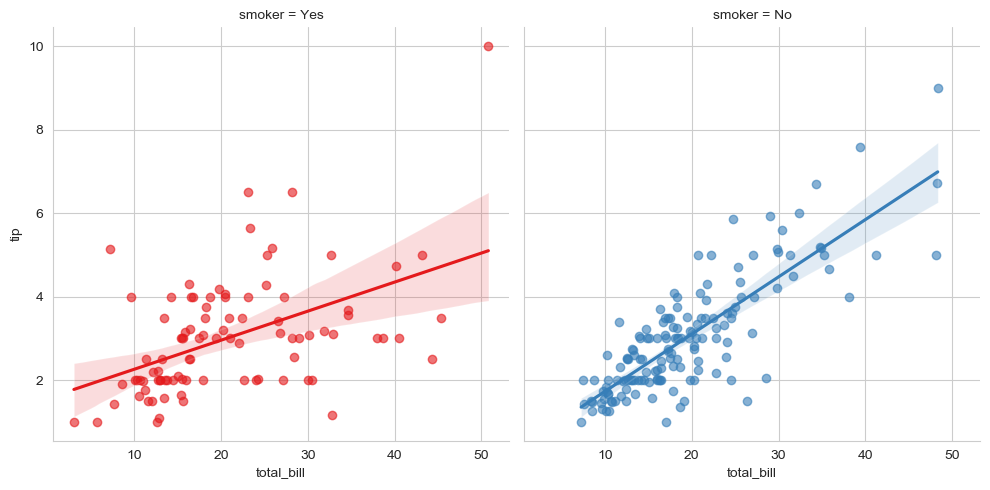

In [26]:
# 方法1: 使用regplot（基础线性回归图）
sns.regplot(data=tips, x="total_bill", y="tip", 
            scatter_kws={"color": "gray", "alpha": 0.5},
            line_kws={"color": "red"})

# 方法2: 使用lmplot（支持按类别分面）
sns.lmplot(data=tips, x="total_bill", y="tip", 
           col="smoker", hue="smoker",
           scatter_kws={"alpha": 0.6},
           palette="Set1")

plt.show()

# 3. 箱线图（Box Plot）

/var/folders/cd/6gw212g16h3dr3bbgjtd725r0000gn/T/ipykernel_65621/786639121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="sepal_length", data=iris, palette="Pastel1")


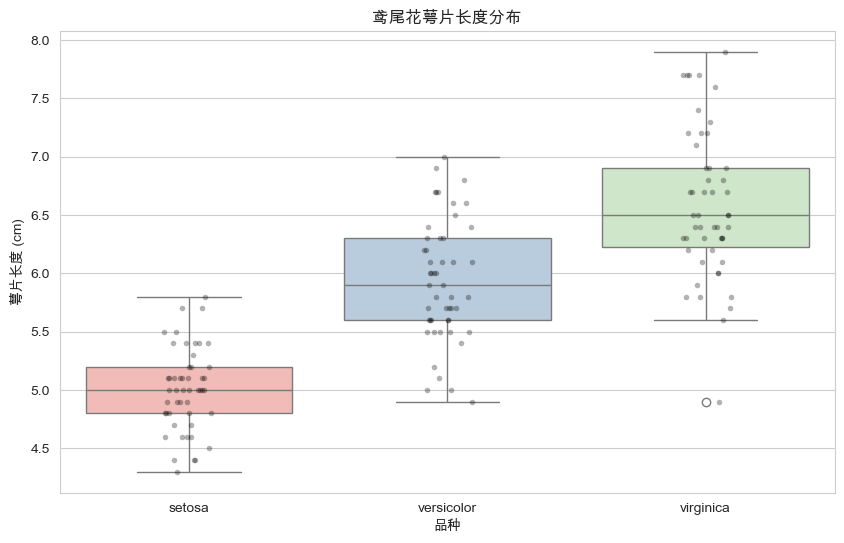

In [27]:
# 加载鸢尾花数据集
iris = sns.load_dataset("iris")

# 创建箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_length", data=iris, palette="Pastel1")

# 添加散点图展示原始数据
sns.stripplot(x="species", y="sepal_length", data=iris, 
              jitter=True, size=4, color="black", alpha=0.3)

plt.title("鸢尾花萼片长度分布")
plt.xlabel("品种")
plt.ylabel("萼片长度 (cm)")
plt.show()

# 4. 热力图（Heatmap）

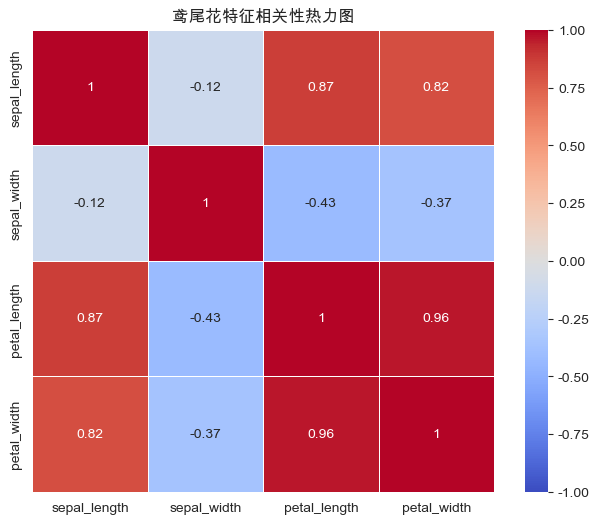

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = sns.load_dataset("iris")

# 修正：仅选择数值列（排除species列）
numeric_columns = iris.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = iris[numeric_columns].corr()

# 创建热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", 
            square=True, linewidths=.5, vmin=-1, vmax=1)

plt.title("鸢尾花特征相关性热力图")
plt.show()

# 5. 小提琴图（Violin Plot）

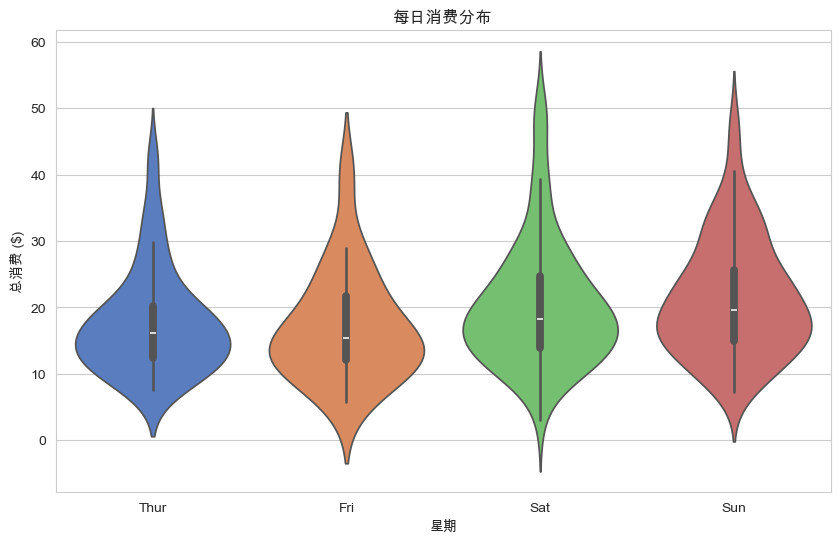

In [29]:
# 结合箱线图和核密度估计
plt.figure(figsize=(10, 6))
sns.violinplot(x="day", y="total_bill", data=tips, 
               palette="muted", hue="day", legend=False)  # 修正：添加hue="day"并关闭图例

plt.title("每日消费分布")
plt.xlabel("星期")
plt.ylabel("总消费 ($)")
plt.show()

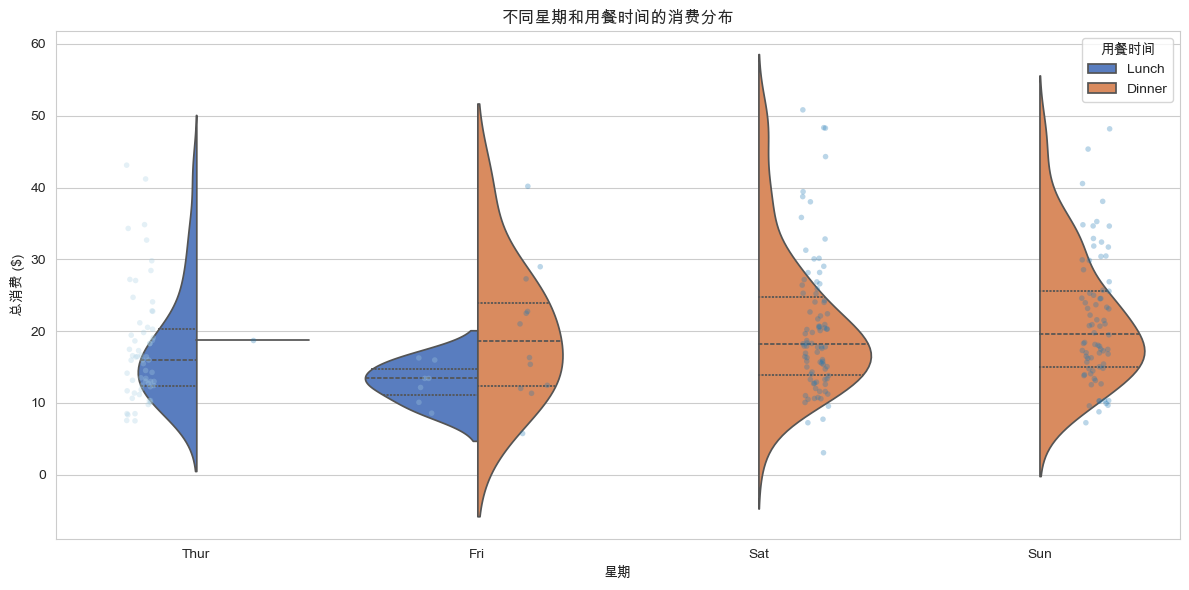

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据
tips = sns.load_dataset("tips")


# 创建小提琴图，按星期分组，对比午餐和晚餐
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="day", 
    y="total_bill", 
    hue="time",  # 按用餐时间分组
    data=tips, 
    palette="muted",
    split=True,  # 将小提琴图从中间分开，便于对比
    inner="quartile"  # 显示四分位数
)

# 添加散点图展示原始数据
sns.stripplot(
    x="day", 
    y="total_bill", 
    hue="time",
    data=tips, 
    jitter=True,  # 添加随机抖动，避免点重叠
    size=4, 
    alpha=0.3,
    dodge=True  # 按hue分组错开显示
)

# 调整图例
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="用餐时间", loc="upper right")

plt.title("不同星期和用餐时间的消费分布")
plt.xlabel("星期")
plt.ylabel("总消费 ($)")
plt.tight_layout()
plt.show()

# 6. 直方图（Histogram）与核密度图（KDE）

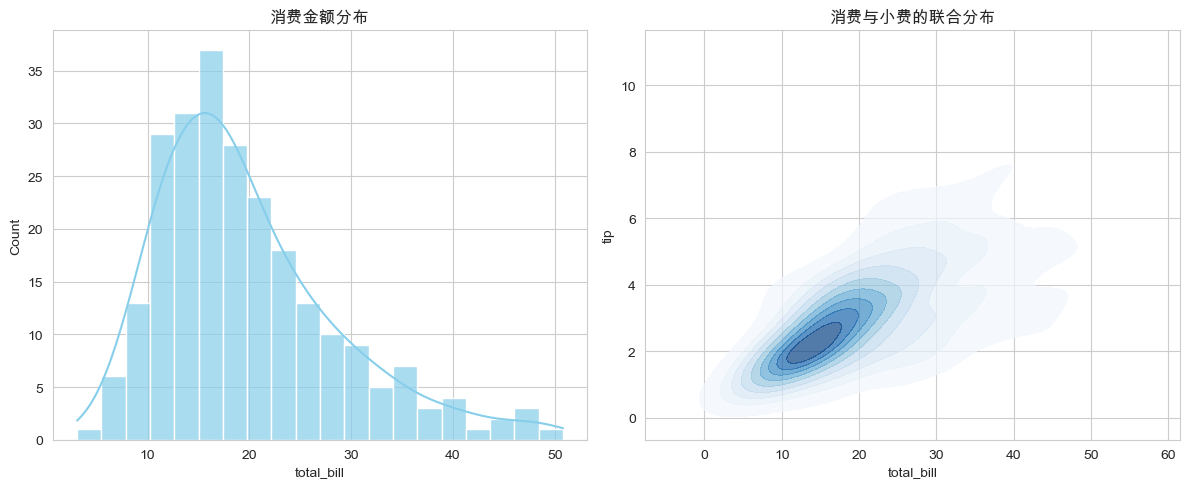

In [31]:
# 单变量分布
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(tips["total_bill"], kde=True, bins=20, 
             color="skyblue", alpha=0.7)
plt.title("消费金额分布")

# 双变量分布
plt.subplot(1, 2, 2)
sns.kdeplot(data=tips, x="total_bill", y="tip", 
            fill=True, cmap="Blues", alpha=0.7)
plt.title("消费与小费的联合分布")

plt.tight_layout()
plt.show()

# 7. 分类图（Categorical Plot）

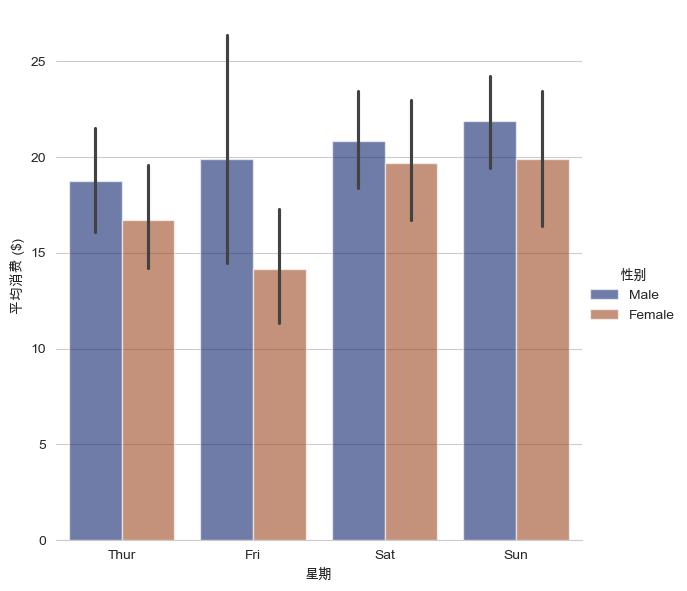

In [32]:
# 使用catplot进行分面分类图
g = sns.catplot(
    data=tips, kind="bar",
    x="day", y="total_bill", hue="sex",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("星期", "平均消费 ($)")
g.legend.set_title("性别")
plt.show()

# 8. 多变量网格图（Pair Plot）

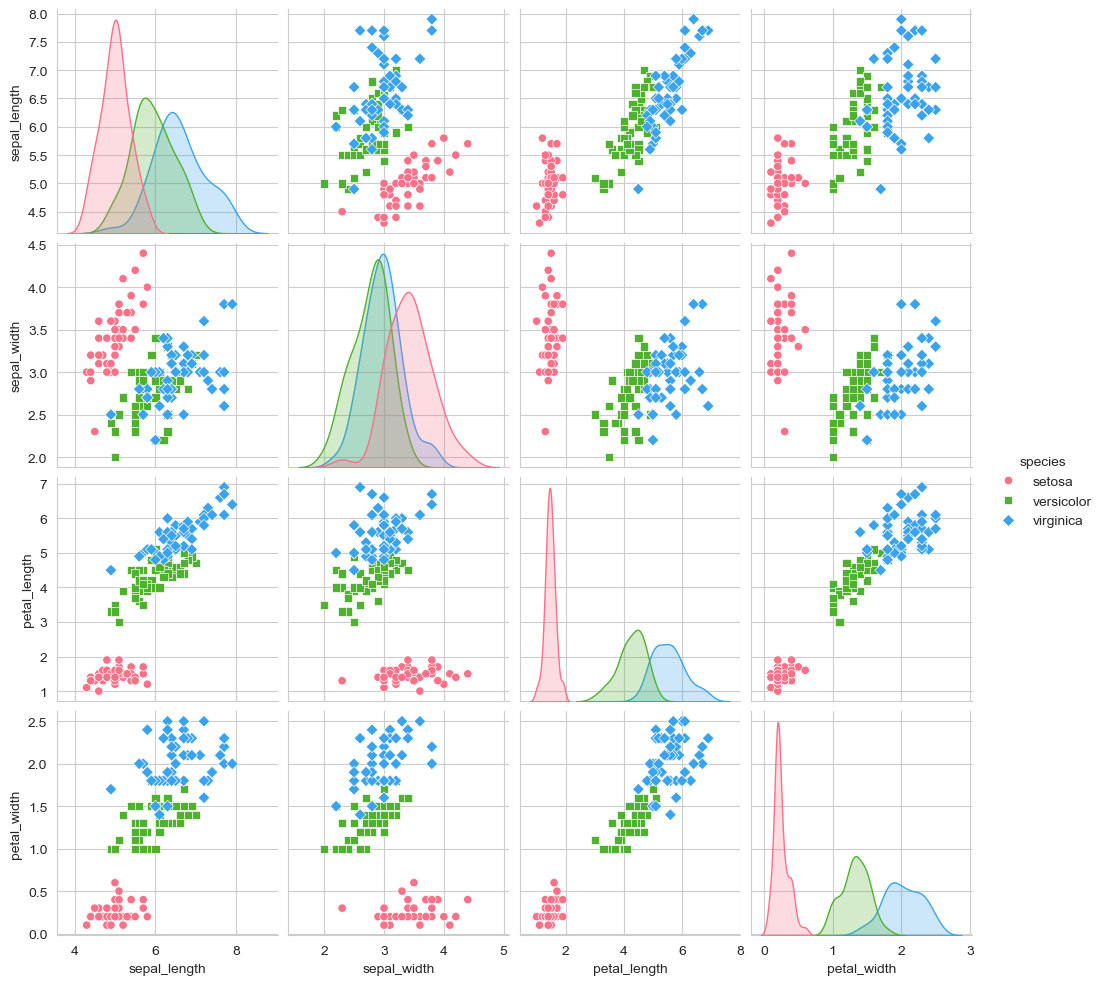

In [33]:
# 绘制鸢尾花数据集的特征关系
sns.pairplot(iris, hue="species", palette="husl", 
             diag_kind="kde", markers=["o", "s", "D"])

plt.show()

# 9. 样式与主题设置

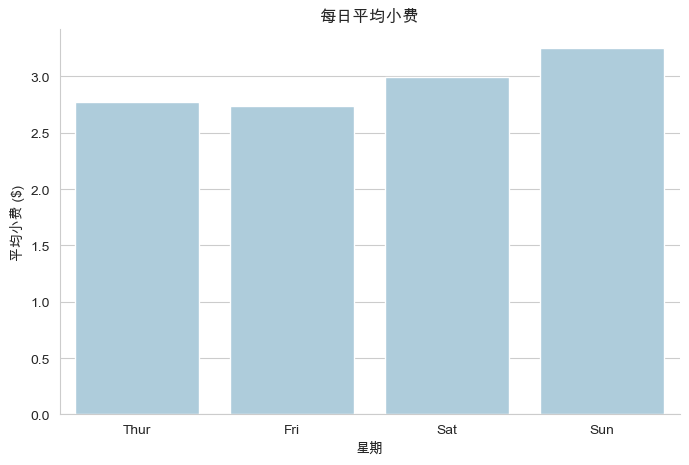

In [34]:
# 设置全局样式
sns.set_style("whitegrid")  # 可选: white, dark, whitegrid, darkgrid, ticks

# 自定义颜色主题
custom_palette = sns.color_palette("Paired", 10)
sns.set_palette(custom_palette)

# 创建图形
plt.figure(figsize=(8, 5))
sns.barplot(x="day", y="tip", data=tips, errorbar=None)

# 移除边框
sns.despine()

# 设置matplotlib正常显示中文和负号
plt.rcParams['font.family'] = 'sans-serif'  # 使用系统默认字体
# 设置字体为黑体, 'STHeitiSC-Light'是系统自带字体，'SimHei'是常见中文字体，'Arial Unicode MS'是支持更广泛Unicode字符的字体
plt.rcParams['font.sans-serif'] = ['STHeitiSC-Light', 'SimHei', 'Arial Unicode MS']  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

plt.title("每日平均小费")
plt.xlabel("星期")
plt.ylabel("平均小费 ($)")
plt.show()

# 10. 时间序列数据可视化

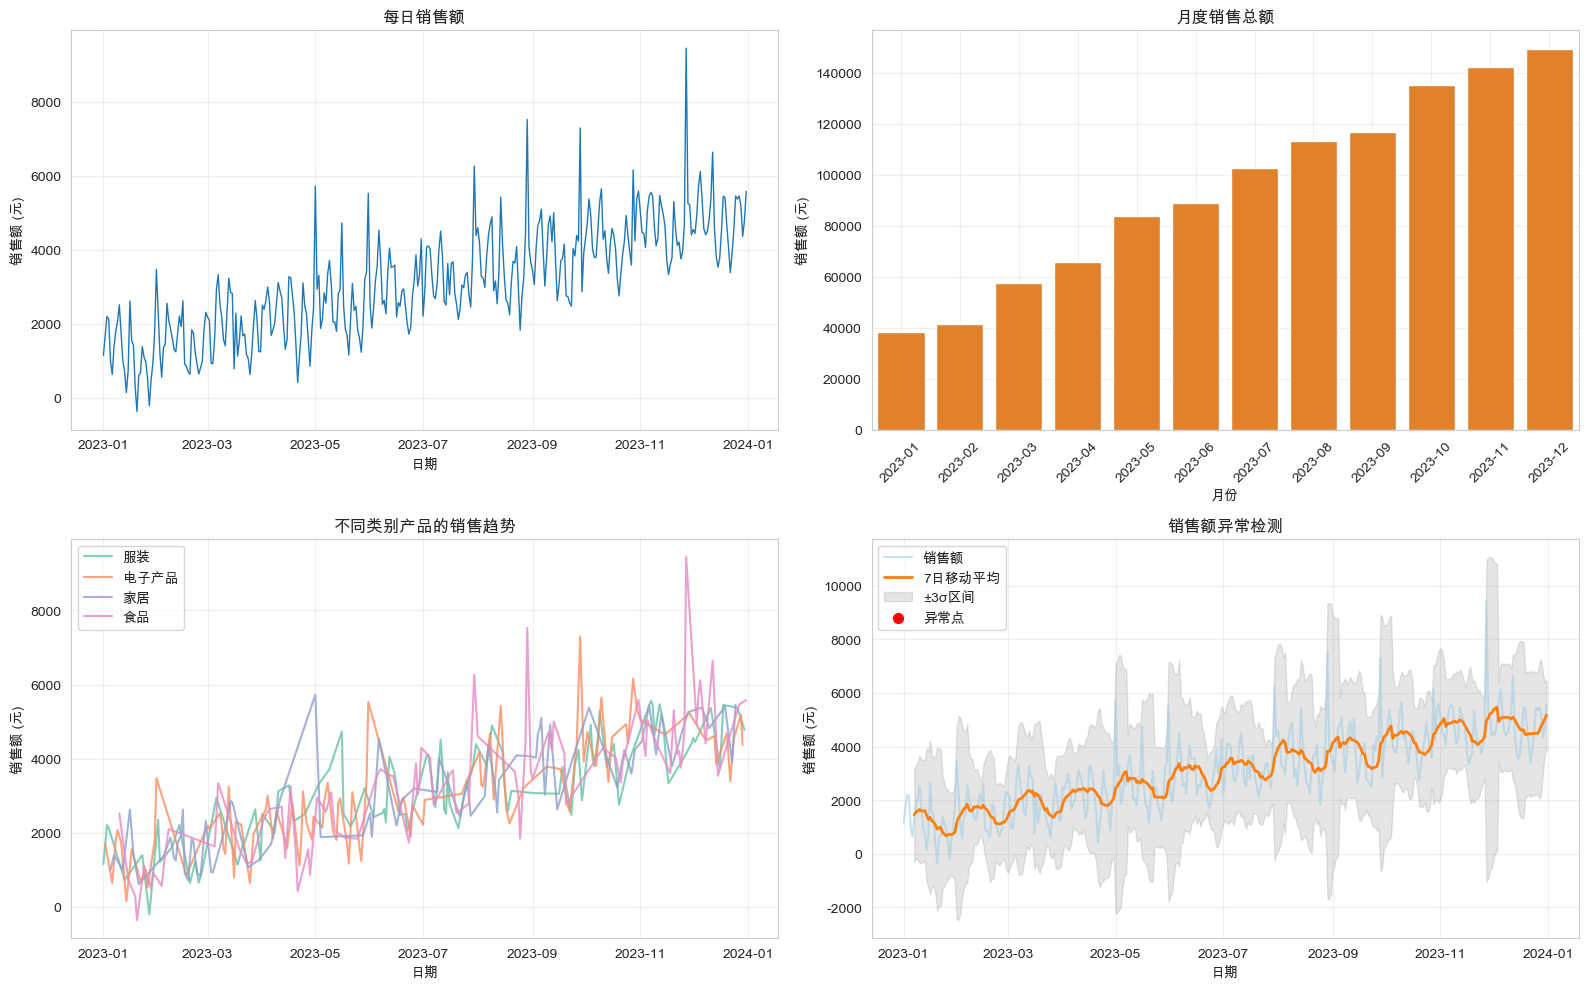

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

# 设置中文字体
# 设置matplotlib正常显示中文和负号
plt.rcParams['font.family'] = 'sans-serif'  # 使用系统默认字体
# 设置字体为黑体, 'STHeitiSC-Light'是系统自带字体，'SimHei'是常见中文字体，'Arial Unicode MS'是支持更广泛Unicode字符的字体
plt.rcParams['font.sans-serif'] = ['STHeitiSC-Light', 'SimHei', 'Arial Unicode MS']  
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号



# ----------------------
# 1. 生成模拟电商销售数据
# ----------------------
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")

# 基础趋势（线性增长）
trend = np.linspace(1000, 5000, len(dates))

# 每周季节性波动（周末销售额高）
weekly_seasonality = 800 * np.sin(np.arange(len(dates)) * 2 * np.pi / 7)

# 每月季节性波动（月初和月底销售额高）
monthly_seasonality = 500 * np.sin(np.arange(len(dates)) * 2 * np.pi / 30)

# 特殊事件（如促销活动）
events = np.zeros(len(dates))
event_dates = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
events[event_dates] = 1000

# 随机噪声
noise = np.random.normal(0, 300, len(dates))

# 组合生成销售额
sales = trend + weekly_seasonality + monthly_seasonality + events + noise

# 添加异常点
anomaly_indices = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
sales[anomaly_indices] = sales[anomaly_indices] * 1.8  # 异常高的销售额

# 创建DataFrame
data = pd.DataFrame({
    "日期": dates,
    "销售额": sales,
    "类别": np.random.choice(["电子产品", "服装", "食品", "家居"], size=len(dates)),
    "地区": np.random.choice(["华东", "华北", "华南", "西南", "西北"], size=len(dates))
})

# ----------------------
# 2. 绘制时间序列分析图
# ----------------------
plt.figure(figsize=(16, 10))

# 子图1：原始销售数据
plt.subplot(2, 2, 1)
sns.lineplot(data=data, x="日期", y="销售额", color="#1f77b4", linewidth=1)
plt.title("每日销售额")
plt.ylabel("销售额 (元)")
plt.grid(alpha=0.3)

# 子图2：月度销售趋势
data['月份'] = data['日期'].dt.to_period('M')
monthly_sales = data.groupby('月份')['销售额'].sum().reset_index()
monthly_sales['月份'] = monthly_sales['月份'].astype(str)  # 转换为字符串以便绘图

plt.subplot(2, 2, 2)
sns.barplot(data=monthly_sales, x="月份", y="销售额", color="#ff7f0e")
plt.title("月度销售总额")
plt.ylabel("销售额 (元)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 子图3：按类别分组的销售趋势
plt.subplot(2, 2, 3)
sns.lineplot(
    data=data, x="日期", y="销售额", 
    hue="类别", palette="Set2", 
    linewidth=1.5, alpha=0.8
)
plt.title("不同类别产品的销售趋势")
plt.ylabel("销售额 (元)")
plt.grid(alpha=0.3)
plt.legend(loc='upper left')

# 子图4：移动平均与异常检测
window = 7
data['移动平均'] = data['销售额'].rolling(window=window).mean()
data['移动标准差'] = data['销售额'].rolling(window=window).std()
data['上限'] = data['移动平均'] + 3 * data['移动标准差']
data['下限'] = data['移动平均'] - 3 * data['移动标准差']
data['异常'] = (data['销售额'] > data['上限']) | (data['销售额'] < data['下限'])

plt.subplot(2, 2, 4)
sns.lineplot(data=data, x="日期", y="销售额", alpha=0.6, label="销售额")
sns.lineplot(data=data, x="日期", y="移动平均", color="#ff7f0e", linewidth=2, label="7日移动平均")
plt.fill_between(data["日期"], data["下限"], data["上限"], color='gray', alpha=0.2, label="±3σ区间")

anomaly_data = data[data['异常']]
plt.scatter(anomaly_data["日期"], anomaly_data["销售额"], color='red', s=50, label="异常点")

plt.title("销售额异常检测")
plt.ylabel("销售额 (元)")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()